In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np
import os

In [14]:
cmap = plt.colormaps['tab20']
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

file_path = r'D:\UNI\MILJOETEK\4. semester\Sensitivity\DU-catalyst-sensitivity_Monte-Carlo-results_ReCiPe-2016-v103-midpoint-H-climate-change-global-warming-potential-GWP1000.xlsx'  # replace with your file path
sheet_name = 'Results'  # replace with your sheet name if necessary
MDU = 'CDU'  # replace with your column name
CDU = 'MDU'  # replace with your column name
Base = 'Base'  # replace with your column name
df = pd.read_excel(file_path, sheet_name=sheet_name)
scenario = df.columns

save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\FU sensitivity'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

C:\Users\rwint\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


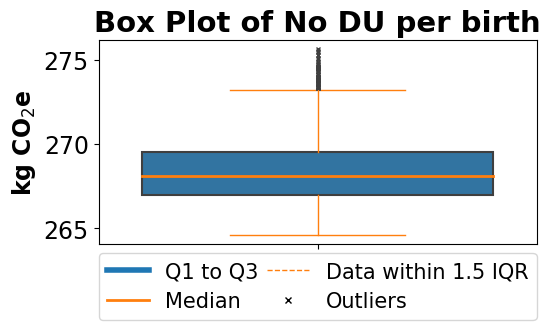

C:\Users\rwint\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


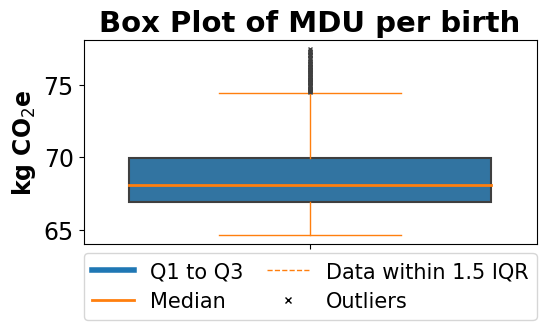

C:\Users\rwint\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


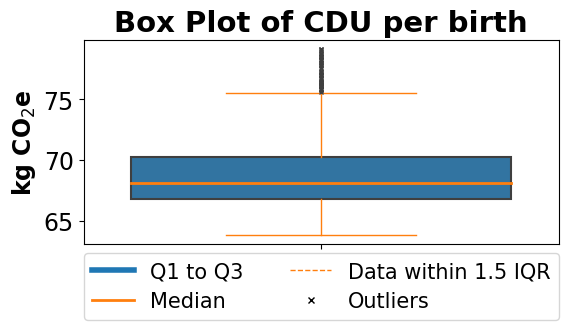

In [15]:
# Read the specific column from the Excel file
for j in range(len(scenario)):
    df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=[scenario[j]])
   

    # Calculate IQR and filter outliers
    Q1 = df[scenario[j]].quantile(0.25)
    Q3 = df[scenario[j]].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[(df[scenario[j]] >= lower_bound) & (df[scenario[j]] <= upper_bound)]

    # Step 2: Create the box plot with filtered data
    plt.figure(figsize=(6,4))
    plt.rcParams.update({'font.size': 17})
    boxplot = sns.boxplot(data=filtered_df, y=scenario[j], flierprops=dict(marker='x', color='k', markersize=3))

    # Customize the colors for the plot components
    for patch in boxplot.artists:
        patch.set_facecolor(colors[0])
        patch.set_edgecolor(colors[0])
        patch.set_linewidth(1)

    for i, line in enumerate(boxplot.lines):
        # Median lines
        if i % 6 == 4:
            line.set_color(colors[1])
            line.set_linewidth(2)
        # Whiskers
        elif i % 6 == 0 or i % 6 == 1:
            line.set_color(colors[1])
            line.set_linewidth(1)
        # Caps
        elif i % 6 == 2 or i % 6 == 3:
            line.set_color(colors[1])
            line.set_linewidth(1)

    # Add the legend with explanations
    legend_elements = [
        plt.Line2D([0], [0], color=colors[0], lw=4, label='Q1 to Q3'),
        plt.Line2D([0], [0], color=colors[1], lw=2, label='Median '),
        plt.Line2D([0], [0], color=colors[1], linestyle='--', lw=1, label='Data within 1.5 IQR'),
        plt.Line2D([0], [0], color='k', marker='x', linestyle='None', markersize=5, label='Outliers')
    ]


    plt.legend(handles=legend_elements, bbox_to_anchor=(0, -0.37, 1, 0.2), loc="lower left", mode="expand", borderaxespad=0,  ncol=2,
               fontsize=15)
    
    # Customize the plot (optional)
    plt.title(f'Box Plot of {scenario[j]} per birth', fontsize=21, weight='bold')
    plt.ylabel('kg CO$_2$e',fontsize=17, weight='bold')


    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'FU_sensitivity_{scenario[j]}.jpg'), bbox_inches='tight')
    # Show the plot
    plt.show()